# Q.1) Delivery_time -> Predict delivery time using sorting time 
## use delivery_time.csv

------------------------------------------------------------

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [50]:
#import libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#surpaas warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
#read the data
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [32]:
#size of the data
data.shape

(21, 2)

In [33]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [34]:
corr_=data.corr()
corr_

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

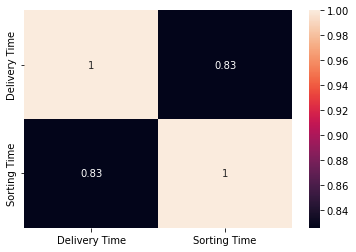

In [35]:
sns.heatmap(corr_, annot=True)

## . There is a positive correlation between Delivery Time and Sorting Time

In [36]:
#skewness and kurtosis
data.skew(),  data.kurt()

(Delivery Time    0.352390
 Sorting Time     0.047115
 dtype: float64,
 Delivery Time    0.317960
 Sorting Time    -1.148455
 dtype: float64)

## ---> From Skewness we can say that Delivery data is little bit positive skew and Sorting data is symmetric

## --->From Kurtosis we can say that there are no Outliers in our data since it is nearly equal to zero.

In [37]:
#renaming the column name
data=data.rename({'Delivery Time':'Delivery_time', 'Sorting Time':'Sorting_time'}, axis=1)

In [38]:
#check for null values
data.isnull().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

## Don't worry, there is no null values present in data 

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

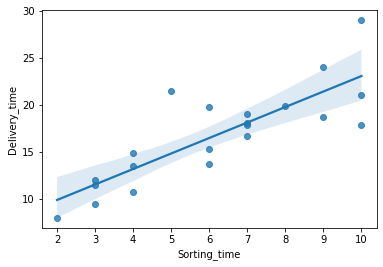

In [41]:
# plot the regression plot
import seaborn as sns
sns.regplot(x='Sorting_time', y='Delivery_time', data=data)

### by observing above plot we can say that the linearity condition fails.

In [52]:
data['Sorting_time'].skew()

0.047115474210530174

In [53]:
data['Delivery_time'].skew()

0.3523900822831107

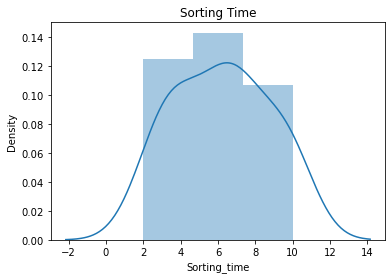

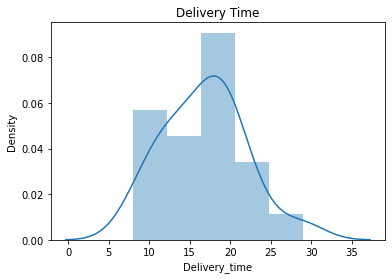

In [51]:
#checking Normality
sns.distplot(a=data['Sorting_time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=data['Delivery_time'])
plt.title('Delivery Time')
plt.show()

### From above plots we can say that,
### for Sorting Time most of the data lie within the group 2 - 10 it seems normally distributed.
### for Delivery Time most of the data lie within the group 10 - 20 it seems +vely skewed.

# Build the regression model using OLS(ordinary least square method)
## here 'delivery time' is predictor or 'sorting time' is independent(regressor) variable.

In [40]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_time ~Sorting_time", data).fit()


In [ ]:
# cofficients
model.params

#  so the Simple linear regression euqation is:
## Delivery_time=1.649*Sorting_time + 6.582

In [69]:
#R squared value and adjusted R squared values
print("model's Rsquared value is:",model.rsquared)
print("model's adjusted Rsquared value is:",model.rsquared_adj)


model's Rsquared value is: 0.6822714748417231
model's adjusted Rsquared value is: 0.6655489208860244


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        17:53:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Build model using Log transformation  
## hence we see sorting_time is normally distributed but Delevery time is little bit skewed so take it in normal or less-skewed form.

In [58]:
data['log_Delivery']=np.log(data['Delivery_time'])
data.head()

,Delivery_time,Sorting_time,log_Delivery
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


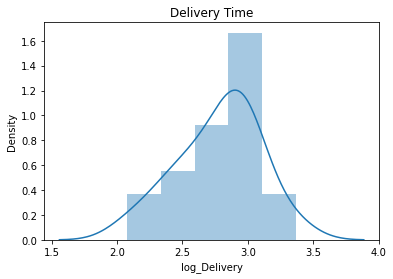

skewness now: -0.4512901148522999


In [60]:
#checking normality of delivery time after log transformation
sns.distplot(a=data['log_Delivery'])
plt.title('Delivery Time')
plt.show()
print("skewness now:",data['log_Delivery'].skew())

## now, this seems to be normal. 
# bulid new model using with log transformed data

In [74]:
new_model=smf.ols("log_Delivery~Sorting_time", data).fit()

In [75]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_Delivery   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        18:23:51   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#parametrs
new_model.params

Intercept       2.121372
Sorting_time    0.105552
dtype: float64

## our SLR Eq. is Delivery_time = 0.1055* Sorting_time + 2.121

In [77]:
#R squared values
(new_model.rsquared, new_model.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

## Model Selection
### After comparing the r-square values for both the models, we can say that the new_model (Log Transformation Model) is good for our data because of high value of r-square.

### Now , we can use our best model for further calculation 

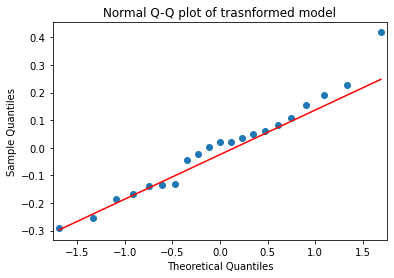

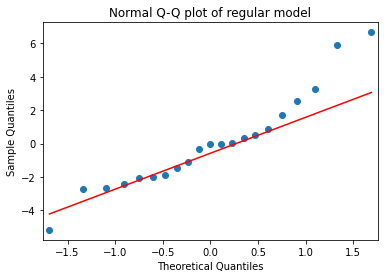

In [80]:
import statsmodels.api as sm

#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(new_model.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

### By observing above two plots of transformed model and regular model,

### we can say that for transformed model maximum points are lie on straight line,

### hence our data follows normality condition. 

In [99]:
#now, prediction 
pred_y=new_model.fittedvalues    #predicted values
pred_y.head() # it show the values  log calculated


0    3.176888
1    2.543578
2    2.754681
3    3.071336
4    3.176888
dtype: float64

In [100]:
np.exp(pred_y).head()  # lets take antilog for original values

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

# ========================XXXXXXXXXXXXXX=====================

# Q.2.
##  Salary_hike -> Build a prediction model for Salary_hike
### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [1]:
import pandas as pd
import numpy as np

In [3]:
#read the data
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#number of observations
len(data)

30

In [7]:
#shape of data
data.shape

(30, 2)

In [9]:
#statistical description of data
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### mean value of YearsExperience is : 5.313 and Salary is : 76003
### YearsExperience range is : 1.10 to 10.50 yrs.
### Salary range is : 37731 to 122391 

In [11]:
#missing values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### No missing value is found.

In [20]:
# skewness and kurtosis
data.skew(), data.kurt()

(YearsExperience    0.37956
 Salary             0.35412
 dtype: float64,
 YearsExperience   -1.012212
 Salary            -1.295421
 dtype: float64)

### so, data is normally distrubuted. 

{'whiskers': [<matplotlib.lines.Line2D at 0x26d7f7c6820>,
 'caps': [<matplotlib.lines.Line2D at 0x26d7f7c6dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d7f7c6550>],
 'medians': [<matplotlib.lines.Line2D at 0x26d7f7d4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d7f7d4610>],
 'means': []}

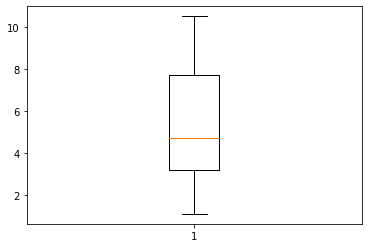

In [21]:
#detecting for outliers
import matplotlib.pyplot as plt
plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26d7f82d190>,
 'caps': [<matplotlib.lines.Line2D at 0x26d7f82d730>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d7f81ce80>],
 'medians': [<matplotlib.lines.Line2D at 0x26d7f82dcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d7f82dfa0>],
 'means': []}

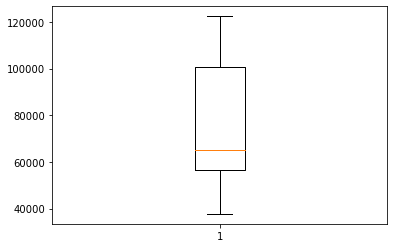

In [22]:
plt.boxplot(data['Salary'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


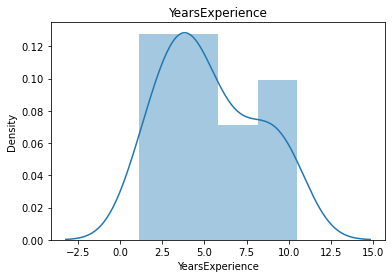

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


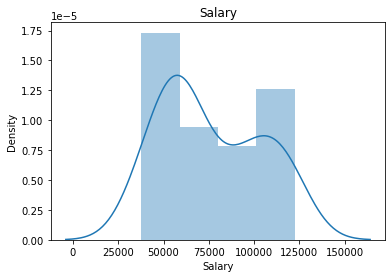

In [26]:
#distribution plot
import seaborn as sns
sns.distplot(data.YearsExperience)
plt.title('YearsExperience')
plt.show()

import seaborn as sns
sns.distplot(data.Salary)
plt.title('Salary')
plt.show()

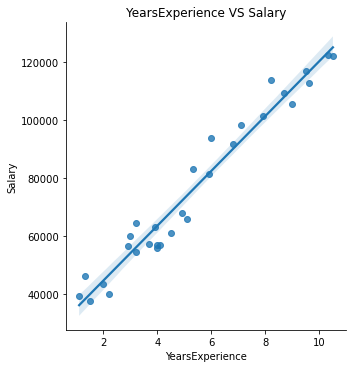

In [29]:
#to check linearity
sns.lmplot(x='YearsExperience',y='Salary',data=data)
plt.title("YearsExperience VS Salary")
plt.show()

### It seems that data is following linearity condition.

In [37]:
#coorelation
corr_=data.corr()
corr_

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

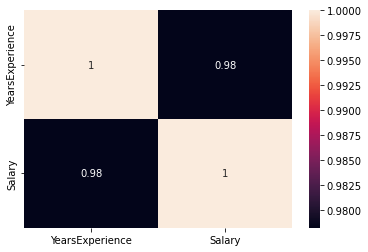

In [39]:
#heatmap
sns.heatmap(corr_, annot=True)

### variables are having strong correlation which is +ve.

# Model Building and Model Training

In [31]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [34]:
#fitting the model
model=smf.ols('Salary~YearsExperience', data=data).fit()

In [36]:
#model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        17:43:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# model parameters
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### our SLR equation look likes
### Salary = 9449.962 * YearsExperience + 25792.200

In [42]:
# rsuare value and adjusted rsquared
print("the R squared value is:", model.rsquared)
print("the adjusted R squared value is:", model.rsquared_adj)

the R squared value is: 0.9569566641435086
the adjusted R squared value is: 0.9554194021486339


### since our r-square value is 0.957

### hence, higher r-squared indicates a better fit for the model.

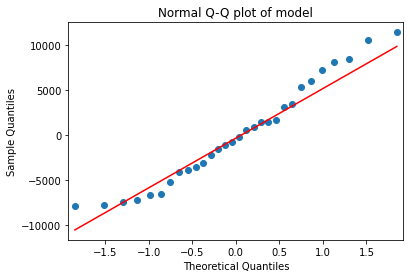

In [44]:
# Q-Q plot
sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of model')
plt.show()


### we can say that for model maximum points are lie on straight line,

### hence our data follows normality condition.

## Now, make predictions 

In [45]:
pred_y=model.fittedvalues    #predicted values
pred_y.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64